# EDA With Titanic Dataset :

## The Titanic dataset is a historical dataset containing information about passengers aboard the RMS Titanic which sank on its #maiden voyage in 1912. This dataset provides valuable insights into the demographics and survival outcomes of the passengers.

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv");

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.shape

(891, 12)

# Data clearining

In [6]:
# Check for missing values

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Handle missing values in the 'Age' column by imputing with the median

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [8]:
# Handle missing values in the 'Embarked' column by imputing with the mode

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [9]:
# Drop the 'Cabin' column as it has a large number of missing values

df.drop('Cabin', axis=1, inplace=True)

In [10]:
# Check for duplicates

num_duplicates = df.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [11]:
# Drop duplicate rows

df.drop_duplicates(inplace=True)

# Correct inconsistencies or errors in the data
# (e.g., converting data types, renaming columns, etc.)
# ...

In [12]:
# Verify if the data cleaning was successful

missing_values_after_cleaning = df.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after_cleaning)

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Statistical Analysis

In [13]:
# Summary Statistics

summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [14]:
# Correlation Analysis

correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


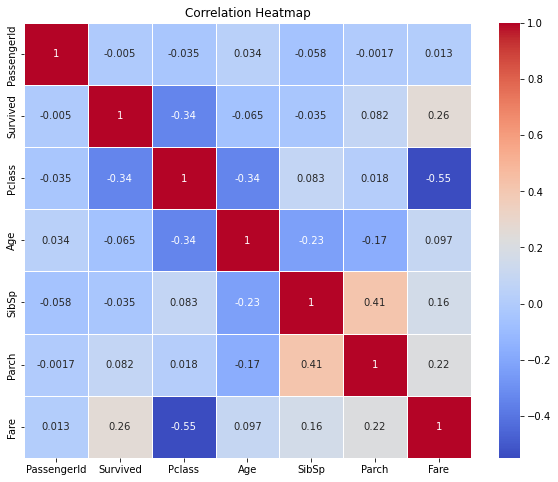

In [15]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

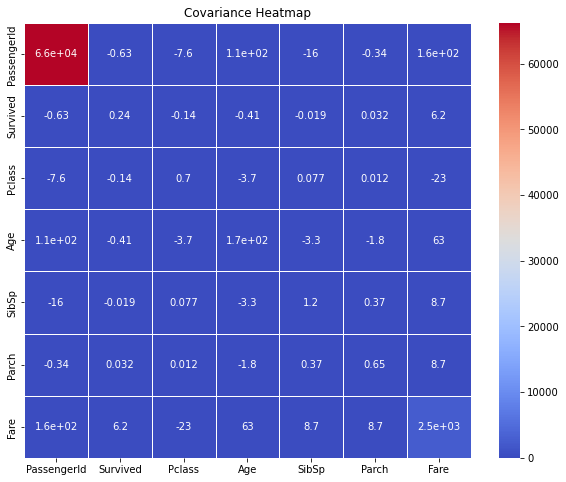

In [16]:
# Compute the covariance matrix
cov_matrix = df.cov()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Heatmap')
plt.show()

In [17]:
# Hypothesis Test: Is there a significant difference in the survival rates based on passenger class?

class_1_survived = df[df['Pclass'] == 1]['Survived']
class_2_survived = df[df['Pclass'] == 2]['Survived']
class_3_survived = df[df['Pclass'] == 3]['Survived']

In [18]:
print(class_1_survived)
print(class_2_survived)
print(class_3_survived)

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64
9      1
15     1
17     1
20     0
21     1
      ..
866    1
874    1
880    1
883    0
886    0
Name: Survived, Length: 184, dtype: int64
0      0
2      1
4      0
5      0
7      0
      ..
882    0
884    0
885    0
888    0
890    0
Name: Survived, Length: 491, dtype: int64


In [19]:
# One-way ANOVA test

f_statistic, p_value = stats.f_oneway(class_1_survived, class_2_survived, class_3_survived)
print("One-way ANOVA test - p-value:", p_value)

One-way ANOVA test - p-value: 2.1832474151179777e-24


In [20]:
# Hypothesis Test: Is there a significant difference in the mean age of survivors and non-survivors?

survived_age = df[df['Survived'] == 1]['Age']
not_survived_age = df[df['Survived'] == 0]['Age']

In [21]:
print(survived_age)
print(not_survived_age)

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64
0      22.0
4      35.0
5      28.0
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888    28.0
890    32.0
Name: Age, Length: 549, dtype: float64


In [22]:
# Independent two-sample t-test

t_statistic, p_value = stats.ttest_ind(survived_age, not_survived_age, equal_var=False)
print("Independent two-sample t-test - p-value:", p_value)

Independent two-sample t-test - p-value: 0.05830915997775747


# Exploratory Data Analysis

In [23]:
# 1. How many records are there in the dataset?

num_records = len(df)
print("Number of records:", num_records)

Number of records: 891


In [24]:
# 2. How many columns are there in the dataset?

num_columns = len(df.columns)
print("Number of columns:", num_columns)

Number of columns: 11


In [25]:
# 3. What are the column names in the dataset?

column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [26]:
# 4. What are the data types of each column?

data_types = df.dtypes
print("Data types:\n", data_types)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [27]:
# 5. How many passengers survived?

num_survived = df['Survived'].sum()
print("Number of passengers survived:", num_survived)

Number of passengers survived: 342


In [28]:
# 6. How many passengers did not survive?

num_not_survived = num_records - num_survived
print("Number of passengers who did not survive:", num_not_survived)

Number of passengers who did not survive: 549


In [29]:
# 7. What is the overall survival rate?

survival_rate = (num_survived / num_records) * 100
print("Survival rate (%):", survival_rate)

Survival rate (%): 38.38383838383838


In [30]:
# 8. How many passengers were in each passenger class (Pclass)?

passenger_class_counts = df['Pclass'].value_counts()
print("Passenger class counts:\n", passenger_class_counts)

Passenger class counts:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


In [31]:
# 9. What is the average age of passengers?

average_age = df['Age'].mean()
print("Average age:", average_age)

Average age: 29.36158249158249


In [32]:
# 10. What is the median fare paid by passengers?

median_fare = df['Fare'].median()
print("Median fare:", median_fare)

Median fare: 14.4542


In [33]:
# 11. What is the distribution of genders among passengers?

gender_counts = df['Sex'].value_counts()
print("Gender counts:\n", gender_counts)

Gender counts:
 male      577
female    314
Name: Sex, dtype: int64


In [34]:
# 12. How many passengers had siblings/spouses aboard?

num_siblings_spouses = df['SibSp'].sum()
print("Number of passengers with siblings/spouses aboard:", num_siblings_spouses)

Number of passengers with siblings/spouses aboard: 466


In [35]:
# 13. How many passengers had parents/children aboard?

num_parents_children = df['Parch'].sum()
print("Number of passengers with parents/children aboard:", num_parents_children)

Number of passengers with parents/children aboard: 340


In [36]:
# 14. What is the highest fare paid by a passenger?

max_fare = df['Fare'].max()
print("Highest fare paid:", max_fare)

Highest fare paid: 512.3292


In [37]:
# 15. What is the most common embarkation point?

most_common_embarkation = df['Embarked'].mode().values[0]
print("Most common embarkation point:", most_common_embarkation)

Most common embarkation point: S


In [38]:
# 16. What is the percentage of passengers who traveled alone?

num_traveling_alone = sum((df['SibSp'] == 0) & (df['Parch'] == 0))
percentage_traveling_alone = (num_traveling_alone / num_records) * 100
print("Percentage of passengers traveling alone (%):", percentage_traveling_alone)

Percentage of passengers traveling alone (%): 60.26936026936027


In [39]:
# 17. What is the survival rate based on gender?

survival_rate_gender = df.groupby('Sex')['Survived'].mean()
print("Survival rate based on gender:\n", survival_rate_gender)

Survival rate based on gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [40]:
# 18. What is the survival rate based on passenger class?

survival_rate_class = df.groupby('Pclass')['Survived'].mean()
print("Survival rate based on passenger class:\n", survival_rate_class)

Survival rate based on passenger class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [41]:
# 19. What is the survival rate based on the number of siblings/spouses aboard?

survival_rate_sibsp = df.groupby('SibSp')['Survived'].mean()
print("Survival rate based on the number of siblings/spouses aboard:\n", survival_rate_sibsp)

Survival rate based on the number of siblings/spouses aboard:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


In [42]:
# 20. What is the survival rate based on the number of parents/children aboard?

survival_rate_parch = df.groupby('Parch')['Survived'].mean()
print("Survival rate based on the number of parents/children aboard:\n", survival_rate_parch)

Survival rate based on the number of parents/children aboard:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


# Data Visualization

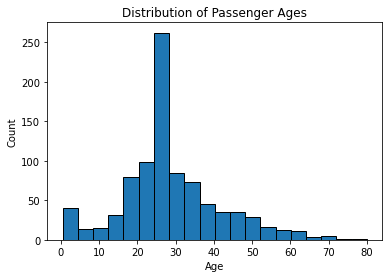

In [43]:
# 1. What is the distribution of passenger ages?

plt.hist(df['Age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()

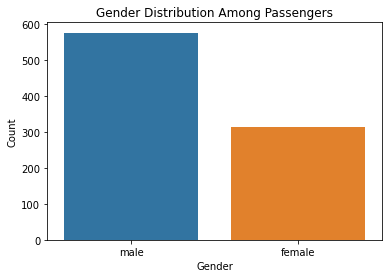

In [44]:
# 2. What is the gender distribution among passengers?

sns.countplot(data=df, x='Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution Among Passengers')
plt.show()

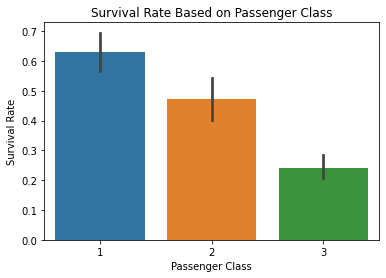

In [45]:
# 3. What is the survival rate based on passenger class?

sns.barplot(data=df, x='Pclass', y='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Passenger Class')
plt.show()

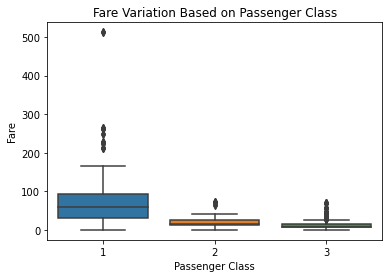

In [46]:
# 4. How does the fare vary based on passenger class?

sns.boxplot(data=df, x='Pclass', y='Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Variation Based on Passenger Class')
plt.show()

In [47]:
# 4.1 Calculate the IQR and outlier boundaries

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [48]:
# 4.2 Filter the dataframe to remove outliers

filtered_df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

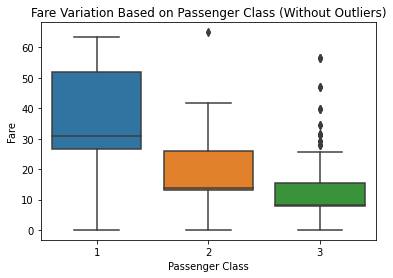

In [49]:
# 4.3 Plot the boxplot without outliers

sns.boxplot(data=filtered_df, x='Pclass', y='Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Variation Based on Passenger Class (Without Outliers)')
plt.show()

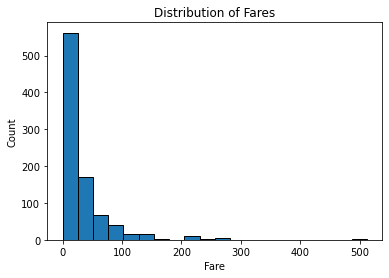

In [50]:
# 5. What is the distribution of fares paid by passengers?

plt.hist(df['Fare'], bins=20, edgecolor='k')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fares')
plt.show()

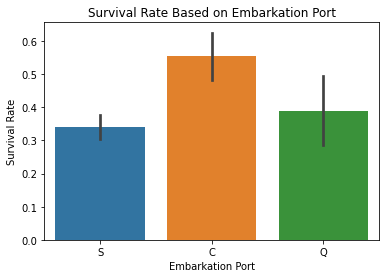

In [51]:
# 6. What is the survival rate based on the port of embarkation?

sns.barplot(data=df, x='Embarked', y='Survived')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Embarkation Port')
plt.show()


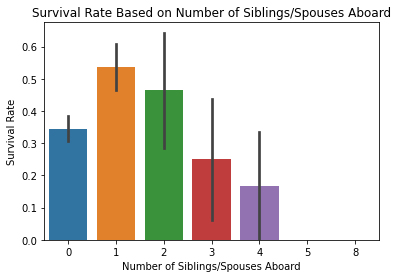

In [52]:
# 7. What is the survival rate based on the number of siblings/spouses aboard?

sns.barplot(data=df, x='SibSp', y='Survived')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Number of Siblings/Spouses Aboard')
plt.show()

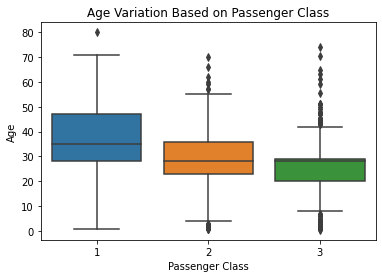

In [53]:
# 8. How does the passenger age vary based on passenger class?

sns.boxplot(data=df, x='Pclass', y='Age')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Variation Based on Passenger Class')
plt.show()

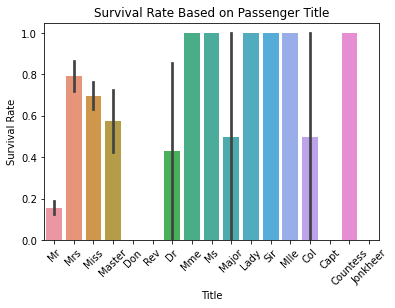

In [54]:
# 9. What is the survival rate based on the passenger's title (extracted from the name)?

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
sns.barplot(data=df, x='Title', y='Survived')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Passenger Title')
plt.xticks(rotation=45)
plt.show()

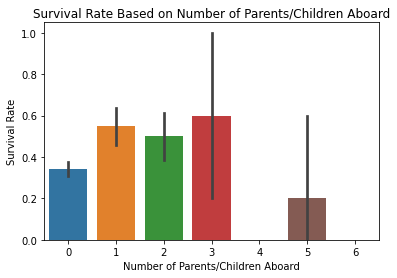

In [55]:
# 10. How does the survival rate vary based on the number of parents/children aboard?

sns.barplot(data=df, x='Parch', y='Survived')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Number of Parents/Children Aboard')
plt.show()